<a href="https://colab.research.google.com/github/JooeunOh/Class2022Spring/blob/main/20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autocorrelation

*   signal과 그 signaldml delay된 복사값 사이의 관계를 의미하며, 별개의 시간에서의 연속된 correlation이라고 이야기되기도 한다. Autocorrelation을 분석하는 것은 반복되는 패턴을 찾기 위해서 사용될 수 있다. 시간 차를 두고 autocorrelation을 했을 때, 그 분석값을 비교하면 어떤 패턴이 나타나는지 찾을 수 있기 때문이다.
*   librosa.pyin()는 probabilistic YIN(pYIN)을 사용해 fudnamental frequency(f0)을 구하는 데에 사용된다.pyin의 매개변수는 audio time series, minimun frequency, maximum frequency이고, 반환값은 f0과 voiced_lag, voiced_prob()이다.
*   voiced_flag는 True or False 값을 가지는 time series로 발화 여부를 나타내며, voiced_prob는 발화 가능성을 포함한 time series를 나타낸다.
*   f0, fundamental frequency는 주기적인 모양을 가지는 곡선에서 가장 작은 주파수를 말한다




#RMS


*   RMS는 quadratic mean, 이차 평균으로 보기도 한다. time의 범위가 정해졌을 때, signal을 위한 RMS는 time 값에 따른 f(t)를 제곱하여 더하고 평균을 구한다음 루트를 씌워 정해진다.
*   이 때, t의 값은 같은 간격이어야 한다.
*   Python에서 librosa.feature.rms()를 통해 RMS 값을 구할 수 있다. 이 함수의 매개 변수로는 audio sample이나 spectogram을 사용할 수 있으며, 이 이외에도 length of analysis frame이나 hop length 등이 추가 매개 변수로 제공될 수 있다. 반환값은 RMS 값이다.
*   RMS를 통해 소리의 진폭의 변화를 파악할 수 있다.
















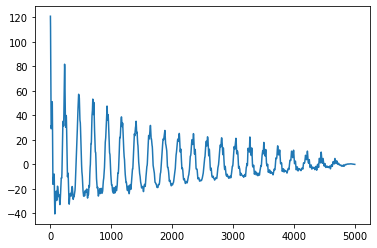

In [7]:
#cf) librosa에 있는 autocorrelation을 구하기 위한 함수

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')

s = librosa.util.normalize(s)

from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)

a=librosa.autocorrelate(sig, axis=- 1)
plt.plot(a)
#x축은 lag, lag의 사이즈는 sig.shape[axis]와 같다.